In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "all_olympic_medalists.csv"

# Load the latest version
data = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "cahyaalkahfi/olympic-medalist-dataset-18962024",
  file_path,
)

print(data.head())

C:\Users\Usuario\AppData\Local\Temp\ipykernel_28760\1483322479.py:7: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  data = kagglehub.load_dataset(


   season  year   medal country_code        country         athletes  \
0  Summer  1896    Gold          USA  United States     Thomas BURKE   
1  Summer  1896  Silver          GER        Germany    Fritz HOFMANN   
2  Summer  1896  Bronze          HUN        Hungary  Alajos SZOKOLYI   
3  Summer  1896  Bronze          USA  United States     Francis LANE   
4  Summer  1896    Gold          USA  United States     Thomas BURKE   

         games      sport event_gender event_name  
0  1896 Athens  Athletics        Men's       100m  
1  1896 Athens  Athletics        Men's       100m  
2  1896 Athens  Athletics        Men's       100m  
3  1896 Athens  Athletics        Men's       100m  
4  1896 Athens  Athletics        Men's       400m  


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
# Load the data
data.head()

,season,year,medal,country_code,country,athletes,games,sport,event_gender,event_name
0,Summer,1896,Gold,USA,United States,Thomas BURKE,1896 Athens,Athletics,Men's,100m
1,Summer,1896,Silver,GER,Germany,Fritz HOFMANN,1896 Athens,Athletics,Men's,100m
2,Summer,1896,Bronze,HUN,Hungary,Alajos SZOKOLYI,1896 Athens,Athletics,Men's,100m
3,Summer,1896,Bronze,USA,United States,Francis LANE,1896 Athens,Athletics,Men's,100m
4,Summer,1896,Gold,USA,United States,Thomas BURKE,1896 Athens,Athletics,Men's,400m


In [4]:
def overview(data):
    print("=".center(50,"="))
    print(f"\nAll Olympic Medalist Overview")
    print(f"Shape: {data.shape}")
    print("=".center(50,"="))

    print("Information about the features:")
    print(data.info())
    print("=".center(50,"="))

    print("Basic statistics check:")
    print(data.describe())
    print("=".center(50,"="))

    print("Checking the number of unique values:")
    unique_counts = {}
    for column in data.columns:
        unique_counts[column] = data[column].nunique()
    unique_df = pd.DataFrame(unique_counts, index=["Unique Count"]).transpose()
    print(unique_df)
    print("=".center(50, "="))

In [5]:
overview(data)


All Olympic Medalist Overview
Shape: (20247, 10)
Information about the features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20247 entries, 0 to 20246
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   season        20247 non-null  object
 1   year          20247 non-null  int64 
 2   medal         20243 non-null  object
 3   country_code  20243 non-null  object
 4   country       20243 non-null  object
 5   athletes      19820 non-null  object
 6   games         20247 non-null  object
 7   sport         20247 non-null  object
 8   event_gender  20247 non-null  object
 9   event_name    20247 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.5+ MB
None
Basic statistics check:
               year
count  20247.000000
mean    1979.503235
std       33.805505
min     1896.000000
25%     1960.000000
50%     1988.000000
75%     2008.000000
max     2024.000000
Checking the number of unique values:
        

# Handle missing values

In [6]:
# Check for missing values
print(data.isnull().sum())

season            0
year              0
medal             4
country_code      4
country           4
athletes        427
games             0
sport             0
event_gender      0
event_name        0
dtype: int64


In [7]:
def clean_data(data):
        return (
        data
        # Drop rows where medal is missing (since country info is also missing)
        .dropna(subset=['medal', 'country_code', 'country'])
        # For missing athletes, mark as 'Unknown'
        .assign(athletes=lambda x: x['athletes'].fillna('Unknown'))
        # Convert year to datetime (optional, but useful for time series)
        .assign(year_date=lambda x: pd.to_datetime(x['year'], format='%Y'))
        # Convert categorical columns to proper dtype
        .astype({
            'season': 'category',
            'medal': 'category',
            'event_gender': 'category'
        })
    )

cleaned_data = clean_data(data)

In [8]:
# Check for missing values
print(cleaned_data.isnull().sum())

season          0
year            0
medal           0
country_code    0
country         0
athletes        0
games           0
sport           0
event_gender    0
event_name      0
year_date       0
dtype: int64


# **Olympic Medalist Dataset Analysis 🏅**  
Dataset containing all Olympic medalists from 1896 to 2024. Ideal for historical performance analysis, country comparisons, and athlete achievement tracking.

## **Data Dictionary**

### **Core Fields**

| **Parameter**       | **Description**                                  | **Data Type**     | **Range/Values**                       |
|---------------------|------------------------------------------------|-------------------|----------------------------------------|
| `year`              | Olympic year                                   | Numerical (int)   | 1896–2024                             |
| `season`            | Summer or Winter Olympics                     | Categorical       | ['Summer', 'Winter']                  |
| `medal`             | Medal type awarded                            | Categorical       | ['Gold', 'Silver', 'Bronze']          |
| `country_code`      | 3-letter country code                         | Categorical       | 158 unique codes                      |
| `country`           | Full country name                             | Categorical       | 168 unique names                      |
| `athletes`          | Name of medal-winning athlete                | String            | 16,352 unique names                   |
| `sport`             | Olympic sport category                       | Categorical       | 77 unique sports                      |
| `event_gender`      | Gender category for the event                | Categorical       | ["Men's", "Women's", "Mixed"]         |
| `event_name`        | Specific competition event                   | Categorical       | 716 unique events                     |

---

### **Dataset Overview**

- **Size**: 20,247 entries × 10 columns (after cleaning)  
- **Missing Values**:  
  - 427 athlete names marked as 'Unknown'  
  - 4 records with missing medal/country data removed  
- **Key Features**:  
  - Temporal coverage: 128 years of Olympic history  
  - High cardinality in athletes and events  
  - Gender distribution across sports  

### **Key Statistics**

| **Feature**        | **Min** | **Max**  | **Mean/Count** | **Notes**                          |
|--------------------|---------|----------|----------------|------------------------------------|
| `year`             | 1896    | 2024     | Avg: 1979.5    | Biennial events (excluding war years) |
| `medal`            | -       | -        | Gold: 33.3%    | Balanced distribution              |
| `event_gender`     | -       | -        | Men's: 72.1%   | Historical gender disparity        |

| **Categorical**    | **Unique Values** | **Top Value**       | **Frequency** |  
|--------------------|-------------------|---------------------|---------------|
| `country`          | 168               | United States       | 2,568         |
| `sport`            | 77                | Athletics           | 4,211         |
| `athletes`         | 16,352            | Unknown             | 427           |

---

### **Notes**

1. **Data Quality Insights**:  
   - **United States** leads in total medals (15.8% of all medals)  
   - **Athletics** dominates as the most medaled sport (20.8% of medals)  
   - **Men's events** represent 72.1% of all medals (historical bias)  
   - Average medals per year: **158** (summer and winter combined)  

2. **Actionable Analysis**:  
   - Compare USA's medal dominance with other top countries (GER, GBR, RUS)  
   - Investigate gender distribution trends over time  
   - Analyze sport specialization by country  
   - Track athlete performance across multiple Olympics  

# EDA (Exploratory Data Analysis)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_28760\290314283.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=medal_dist.index, y=medal_dist.values,
C:\Users\Usuario\AppData\Local\Temp\ipykernel_28760\290314283.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[2], x=season_dist.index, y=season_dist.values,
C:\Users\Usuario\AppData\Local\Temp\ipykernel_28760\290314283.py:92: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medal_counts = (cleaned_data.groupby(['country', 'med

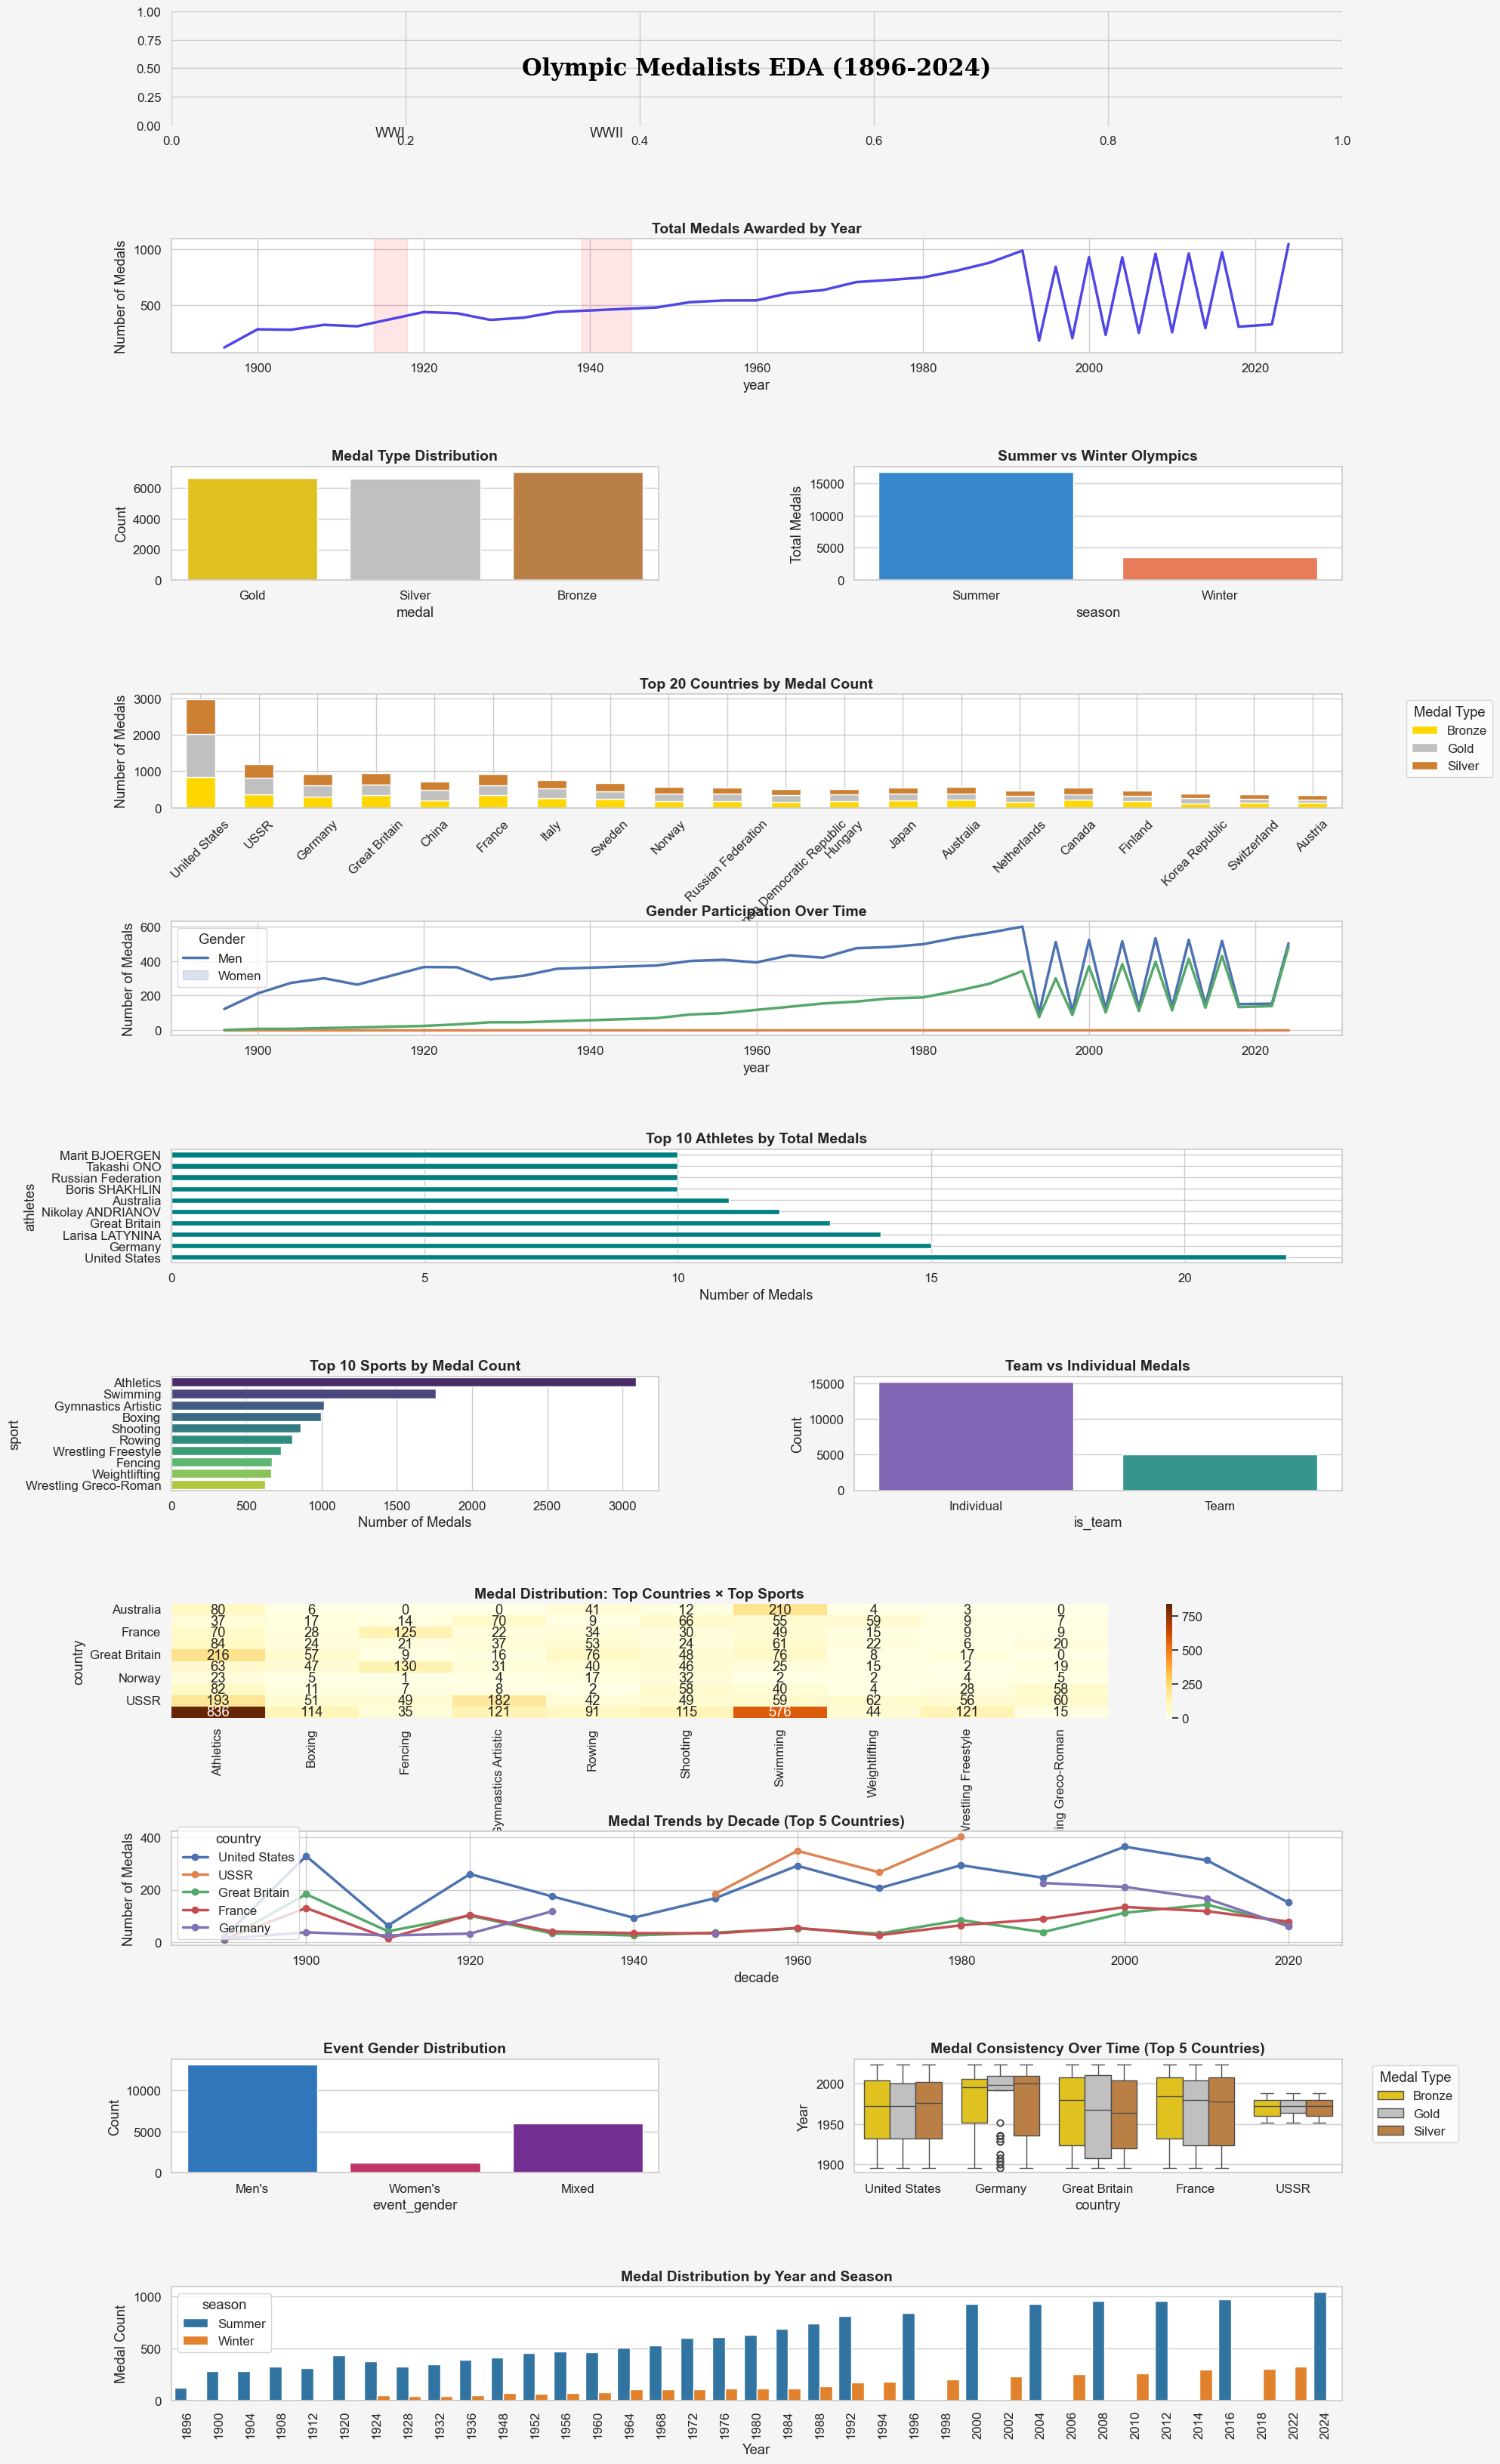

In [ ]:
# Set background and color palette
background_color = "#f5f5f5"
# Gold, Silver, Bronze
medal_palette = ["#FFD700", "#C0C0C0", "#CD7F32"]  
# Summer, Winter
season_palette = ["#1e88e5", "#ff7043"]  
# Men, Women, Mixed
gender_palette = ["#1976d2", "#d81b60", "#7b1fa2"]  

sns.set(style="whitegrid", font_scale=1.1)
plt.rcParams['figure.facecolor'] = background_color

# Create derived features
cleaned_data['decade'] = (cleaned_data['year'] // 10) * 10
cleaned_data['is_team'] = cleaned_data['athletes'].str.contains(',|Team') | (cleaned_data['athletes'] == 'Unknown')

# 📊 Overall Layout with GridSpec
fig = plt.figure(figsize=(20, 45))
gs = fig.add_gridspec(12, 2)
gs.update(wspace=0.4, hspace=1.0)

# Title subplot
title_ax = fig.add_subplot(gs[0, :])
title_ax.set_facecolor(background_color)
for spine in ['bottom', 'left', 'top', 'right']:
    title_ax.spines[spine].set_visible(False)
title_ax.tick_params(left=False, bottom=False)
title_ax.text(0.5, 0.5,
                'Olympic Medalists EDA (1896-2024)',
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=22, fontweight='bold',
                fontfamily='serif',
                color="#000000")

# Assign axes
axes = [
    # 1. Historical Medal Trend
    fig.add_subplot(gs[1, :]),  
    # 2. Medal Type Distribution
    fig.add_subplot(gs[2, 0]),  
    # 3. Season Comparison
    fig.add_subplot(gs[2, 1]),  
    # 4. Top Countries (your existing code)
    fig.add_subplot(gs[3, :]),  
    # 5. Gender Distribution Over Time
    fig.add_subplot(gs[4, :]),  
    # 6. Top Athletes (your existing code)
    fig.add_subplot(gs[5, :]),  
    # 7. Sport Dominance
    fig.add_subplot(gs[6, 0]),  
    # 8. Team vs Individual
    fig.add_subplot(gs[6, 1]),  
    # 9. Country-Sport Heatmap
    fig.add_subplot(gs[7, :]),  
    # 10. Decadal Performance
    fig.add_subplot(gs[8, :]),  
    # 11. Event Gender Distribution
    fig.add_subplot(gs[9, 0]),  
    # 12. Medal Consistency
    fig.add_subplot(gs[9, 1]),
    # 13. Medals over time by season
    fig.add_subplot(gs[10, :])
]

# 1️⃣ Historical Medal Trend
medals_by_year = cleaned_data.groupby('year').size()
sns.lineplot(ax=axes[0], x=medals_by_year.index, y=medals_by_year.values, 
            color='#4f46e5', linewidth=2.5)
axes[0].set_title('Total Medals Awarded by Year', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Number of Medals')
axes[0].axvspan(1914, 1918, color='red', alpha=0.1)  # WWI
axes[0].axvspan(1939, 1945, color='red', alpha=0.1)  # WWII
axes[0].text(1916, 2000, 'WWI', ha='center')
axes[0].text(1942, 2000, 'WWII', ha='center')

# 2️⃣ Medal Type Distribution
medal_dist = cleaned_data['medal'].value_counts()
sns.barplot(ax=axes[1], x=medal_dist.index, y=medal_dist.values, 
            palette=medal_palette, order=['Gold', 'Silver', 'Bronze'])
axes[1].set_title('Medal Type Distribution', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Count')

# 3️⃣ Season Comparison
season_dist = cleaned_data['season'].value_counts()
sns.barplot(ax=axes[2], x=season_dist.index, y=season_dist.values, 
            palette=season_palette)
axes[2].set_title('Summer vs Winter Olympics', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Total Medals')

# 4️⃣ Top Countries by Medal Count
medal_counts = (cleaned_data.groupby(['country', 'medal']).size().unstack()
    .fillna(0).sort_values('Gold', ascending=False).head(20))
medal_counts.plot(kind='bar', stacked=True, color=medal_palette, ax=axes[3])
axes[3].set_title('Top 20 Countries by Medal Count', fontsize=14, fontweight='bold')
axes[3].set_ylabel('Number of Medals')
axes[3].legend(title='Medal Type', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[3].tick_params(axis='x', rotation=45)

# 5️⃣ Gender Distribution Over Time
gender_trend = (
    cleaned_data[cleaned_data['event_gender'].isin(["Men's", "Women's"])]
    .groupby(['year', 'event_gender']).size()
    .reset_index(name='medal_count')
)

sns.lineplot(ax=axes[4], data=gender_trend, x='year', y='medal_count',
                hue='event_gender',
                linewidth=2.5)

axes[4].set_title('Gender Participation Over Time', fontsize=14, fontweight='bold')
axes[4].set_ylabel('Number of Medals')
axes[4].legend(title='Gender', labels=['Men', 'Women'])


# 6️⃣ Top Athletes (your existing code)
top_athletes = (cleaned_data[cleaned_data['athletes'] != 'Unknown'].groupby('athletes')
    .size().sort_values(ascending=False).head(10))
top_athletes.plot(kind='barh', color='teal', ax=axes[5])
axes[5].set_title('Top 10 Athletes by Total Medals', fontsize=14, fontweight='bold')
axes[5].set_xlabel('Number of Medals')

# 7️⃣ Sport Dominance
top_sports = cleaned_data['sport'].value_counts().head(10)
sns.barplot(ax=axes[6], x=top_sports.values, y=top_sports.index, 
            palette='viridis')
axes[6].set_title('Top 10 Sports by Medal Count', fontsize=14, fontweight='bold')
axes[6].set_xlabel('Number of Medals')

# 8️⃣ Team vs Individual
team_dist = cleaned_data['is_team'].value_counts()
sns.barplot(ax=axes[7], x=team_dist.index, y=team_dist.values, 
            palette=['#7e57c2', '#26a69a'])
axes[7].set_title('Team vs Individual Medals', fontsize=14, fontweight='bold')
axes[7].set_xticklabels(['Individual', 'Team'])
axes[7].set_ylabel('Count')

# 9️⃣ Country-Sport Heatmap
top_countries = cleaned_data['country'].value_counts().head(10).index
top_sports_list = cleaned_data['sport'].value_counts().head(10).index
heatmap_data = cleaned_data[
    (cleaned_data['country'].isin(top_countries)) & 
    (cleaned_data['sport'].isin(top_sports_list))
]
heatmap_data = pd.crosstab(heatmap_data['country'], heatmap_data['sport'])
sns.heatmap(ax=axes[8], data=heatmap_data, cmap="YlOrBr", annot=True, fmt="d")
axes[8].set_title('Medal Distribution: Top Countries × Top Sports', fontsize=14, fontweight='bold')

# 🔟 Decadal Performance
decadal = cleaned_data.groupby(['decade', 'country']).size().unstack()
decadal[decadal.columns[decadal.sum().argsort()[::-1][:5]]].plot(
    ax=axes[9], linewidth=2.5, marker='o')
axes[9].set_title('Medal Trends by Decade (Top 5 Countries)', fontsize=14, fontweight='bold')
axes[9].set_ylabel('Number of Medals')

# 1️⃣1️⃣ Event Gender Distribution
gender_dist = cleaned_data['event_gender'].value_counts()
sns.barplot(ax=axes[10], x=gender_dist.index, y=gender_dist.values, 
            palette=gender_palette)
axes[10].set_title('Event Gender Distribution', fontsize=14, fontweight='bold')
axes[10].set_xticklabels(["Men's", "Women's", "Mixed"], rotation=0)
axes[10].set_ylabel('Count')

# 1️⃣2️⃣ Medal Consistency by Country
top_5 = cleaned_data['country'].value_counts().head(5).index
medal_consistency = cleaned_data[cleaned_data['country'].isin(top_5)]
sns.boxplot(ax=axes[11], data=medal_consistency, x='country', y='year', 
            hue='medal', palette=medal_palette)
axes[11].set_title('Medal Consistency Over Time (Top 5 Countries)', fontsize=14, fontweight='bold')
axes[11].set_ylabel('Year')
axes[11].legend(title='Medal Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# 1️⃣3️⃣ Medals over time by season
sns.countplot(ax=axes[12], data=cleaned_data, 
                x='year', hue='season', 
                palette=['#1f77b4', '#ff7f0e'])

axes[12].set_title('Medal Distribution by Year and Season', fontsize=14, fontweight='bold')
axes[12].set_xlabel('Year')
axes[12].set_ylabel('Medal Count')
axes[12].set_xticks(axes[12].get_xticks())
axes[12].set_xticklabels(axes[12].get_xticklabels(), rotation=90)


plt.tight_layout()
plt.show()

## Medal Trend Analysis by Country

C:\Users\Usuario\AppData\Local\Temp\ipykernel_28760\2894952335.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['year', 'country', 'medal'])


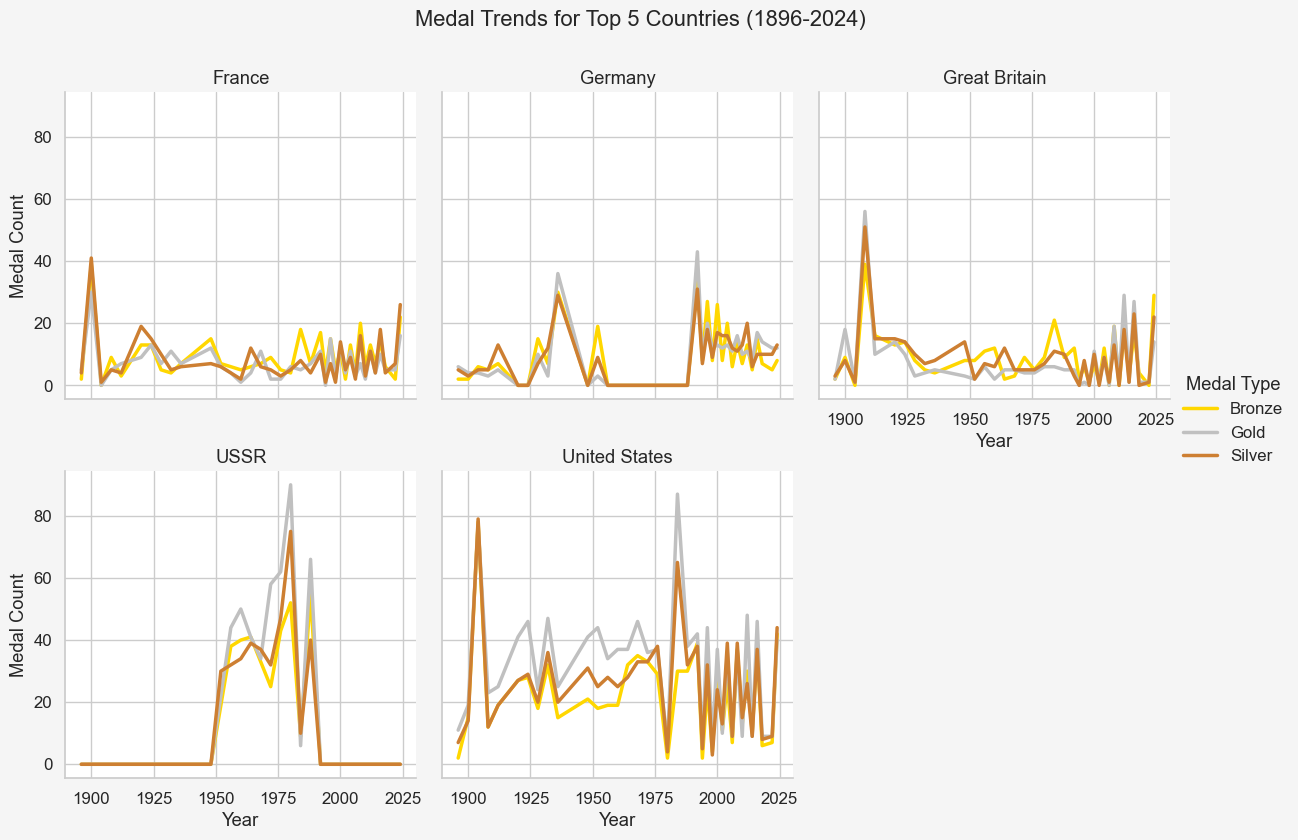

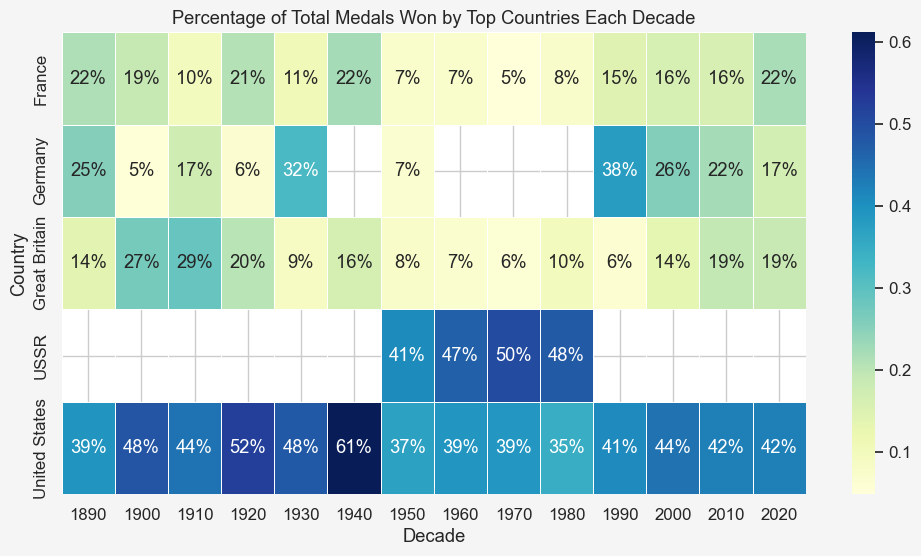

In [10]:
# Select top 5 countries and prepare data
top_countries = cleaned_data['country'].value_counts().head(5).index.tolist()
trend_data = (
    cleaned_data[cleaned_data['country'].isin(top_countries)]
    .groupby(['year', 'country', 'medal'])
    .size()
    .unstack()
    .fillna(0)
    .stack()
    .reset_index(name='count')
)

# Create faceted trend plot
g = sns.FacetGrid(trend_data, col='country', hue='medal', 
                col_wrap=3, height=4, palette=medal_palette)
g.map(sns.lineplot, 'year', 'count', linewidth=2.5)
g.add_legend(title='Medal Type')
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Medal Count")
plt.suptitle('Medal Trends for Top 5 Countries (1896-2024)', y=1.05)
plt.show()

# Calculate dominance ratio
dominance = (
    cleaned_data[cleaned_data['country'].isin(top_countries)]
    .groupby(['decade', 'country'])
    .size()
    .unstack()
    .apply(lambda x: x/x.sum(), axis=1)
)

plt.figure(figsize=(12,6))
sns.heatmap(dominance.T, cmap="YlGnBu", annot=True, fmt=".0%", linewidths=.5)
plt.title('Percentage of Total Medals Won by Top Countries Each Decade')
plt.ylabel('Country')
plt.xlabel('Decade')
plt.show()

## Gender Distribution Across Sports

C:\Users\Usuario\AppData\Local\Temp\ipykernel_28760\1321162156.py:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



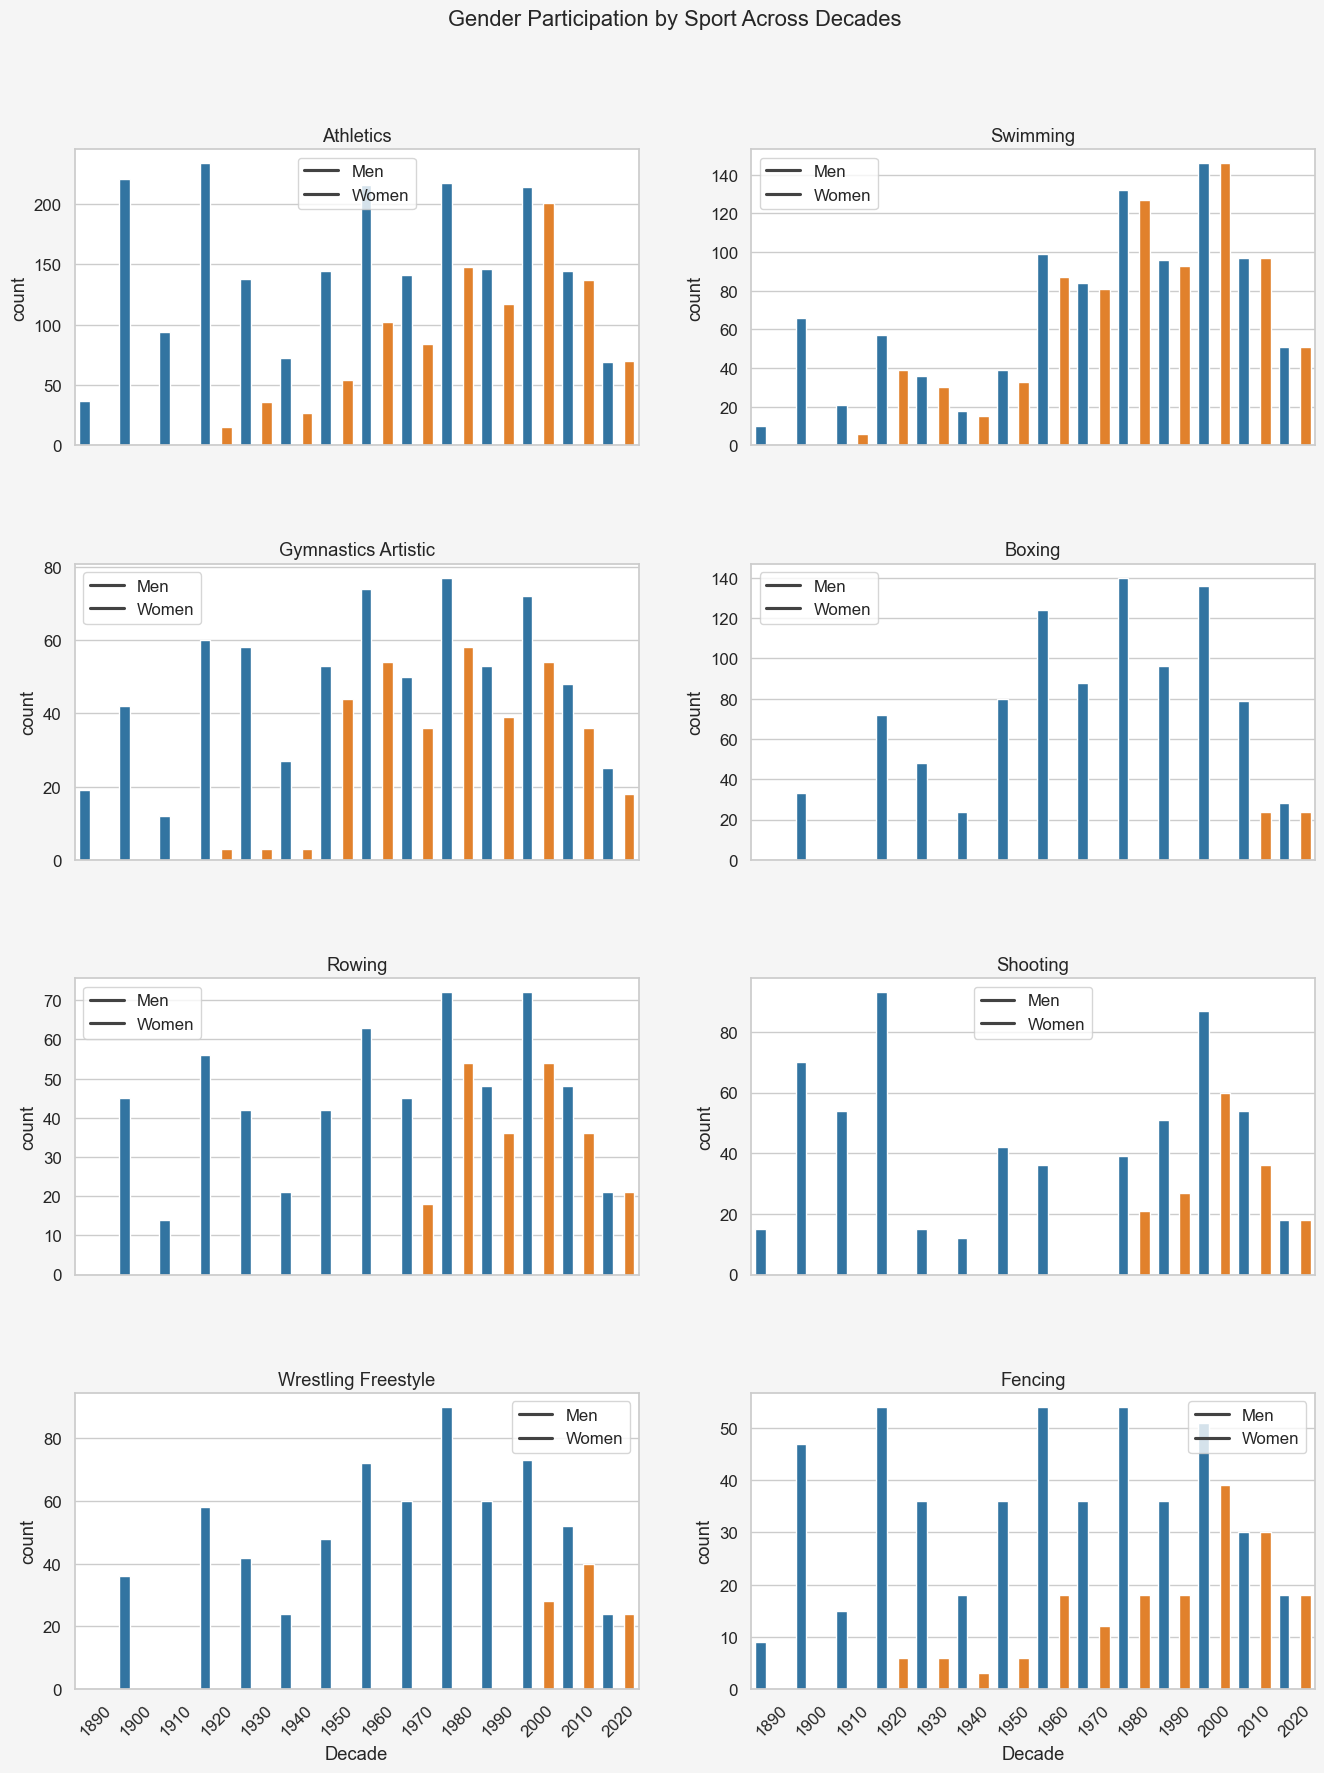

In [22]:
# Prepare gender-sport data
gender_sport = (
    cleaned_data[cleaned_data['event_gender'].isin(["Men's", "Women's"])]
    .groupby(['sport', 'event_gender', 'decade'])
    .size()
    .unstack(['event_gender', 'decade'])
    .fillna(0)
)

# Select sports with sufficient data (top 8)
sports_to_analyze = gender_sport.sum(axis=1).sort_values(ascending=False).head(8).index

# Create small multiples plot
fig, axes = plt.subplots(4, 2, figsize=(16, 20), sharex=True)
fig.subplots_adjust(hspace=0.4)

for ax, sport in zip(axes.flatten(), sports_to_analyze):
    # Get data for the sport and convert to DataFrame
    sport_data = gender_sport.loc[sport].unstack().unstack().to_frame(name='count')
    sport_data = sport_data.reset_index()
    
    sns.barplot(data=sport_data, x='decade', y='count', hue='event_gender',  ax=ax,
    palette={
        "Men's": '#1f77b4',
        "Women's": '#ff7f0e',
        "Mixed": '#2ca02c'
    })

    
    ax.set_title(sport)
    ax.set_xlabel('')
    if ax in axes[-1, :]:  
        ax.set_xlabel('Decade')
    ax.legend(["Men", "Women"])
    ax.tick_params(axis='x', rotation=45)

plt.suptitle('Gender Participation by Sport Across Decades', y=0.95)
plt.show()

## Historical Athlete Achievements

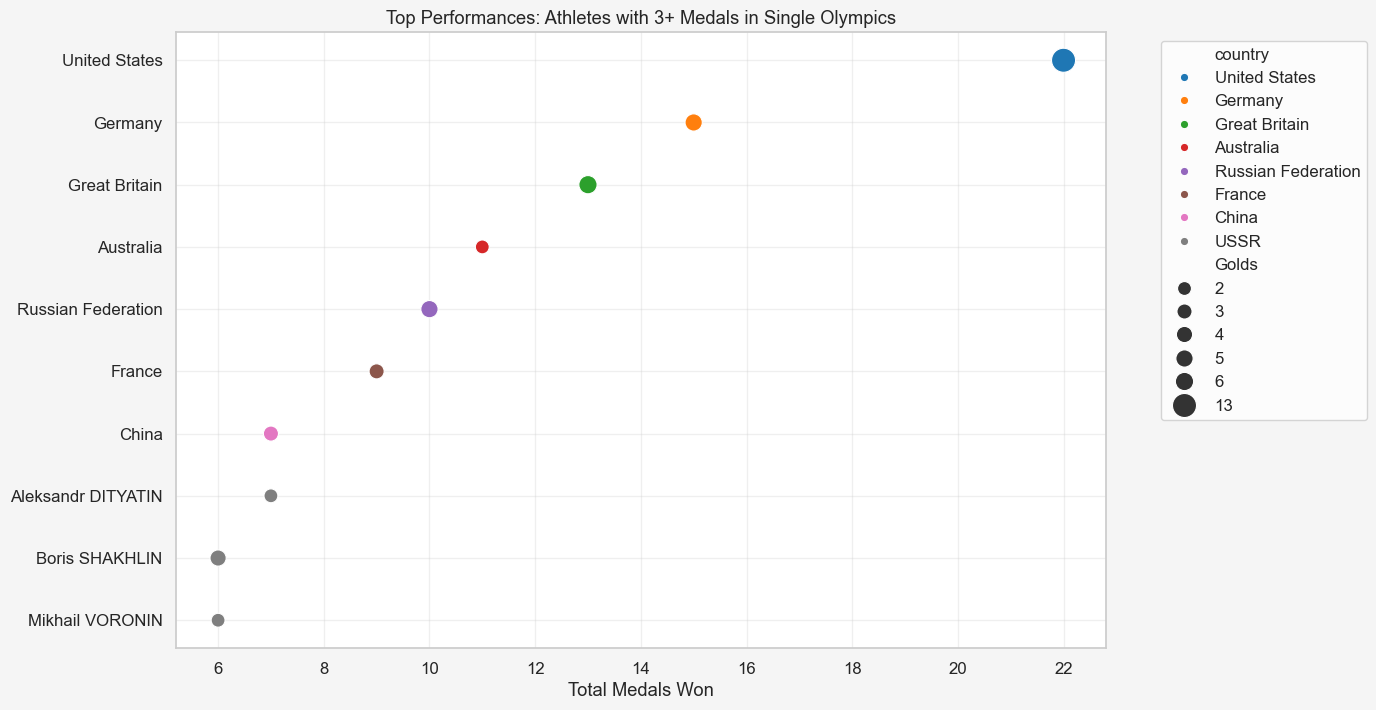

Athletes with Longest Careers (12+ years between first and last medal):
                    first_year  last_year  medals  span_years
athletes                                                     
Marit BJOERGEN            2006       2018      10          12
Raisa SMETANINA           1976       1988       7          12
Gert FREDRIKSSON          1948       1960       7          12
Vladimir SMIRNOV          1980       1994       6          14
Hubert VAN INNIS          1900       1920       6          20
Irena KIRSZENSTEIN        1964       1976       6          12
Klaus DIBIASI             1964       1976       5          12
Gregory LOUGANIS          1976       1988       5          12
Leon ?TUKELJ              1924       1936       5          12
Heikki SAVOLAINEN         1928       1948       5          20


In [ ]:
# Find multi-medalists in single Games
single_games_medalists = (
    cleaned_data[cleaned_data['athletes'] != 'Unknown']
    .groupby(['athletes', 'games'])
    .filter(lambda x: len(x) >= 3)
    .groupby(['athletes', 'games', 'country'])
    .agg(Medals=('medal', 'count'), 
            Golds=('medal', lambda x: (x == 'Gold').sum()))
    .sort_values('Medals', ascending=False)
    .head(10)
)

# Visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(data=single_games_medalists.reset_index(), 
                x='Medals', y='athletes', 
                size='Golds', hue='country',
                sizes=(100, 300), palette='tab10')
plt.title('Top Performances: Athletes with 3+ Medals in Single Olympics')
plt.xlabel('Total Medals Won')
plt.ylabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

# Career longevity analysis
career_spans = (
    cleaned_data[cleaned_data['athletes'] != 'Unknown']
    .groupby('athletes').agg(first_year=('year', 'min'), 
            last_year=('year', 'max'),
            medals=('medal', 'count'))
    .assign(span_years=lambda x: x['last_year'] - x['first_year'])
    # At least 3 Olympic cycles
    .query('span_years >= 12')  
    .sort_values('medals', ascending=False)
)

print("Athletes with Longest Careers (12+ years between first and last medal):")
print(career_spans.head(10))

## Visual Storytelling & Infographics

C:\Users\Usuario\AppData\Local\Temp\ipykernel_28760\72988544.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['year', 'event_gender']).size().unstack()


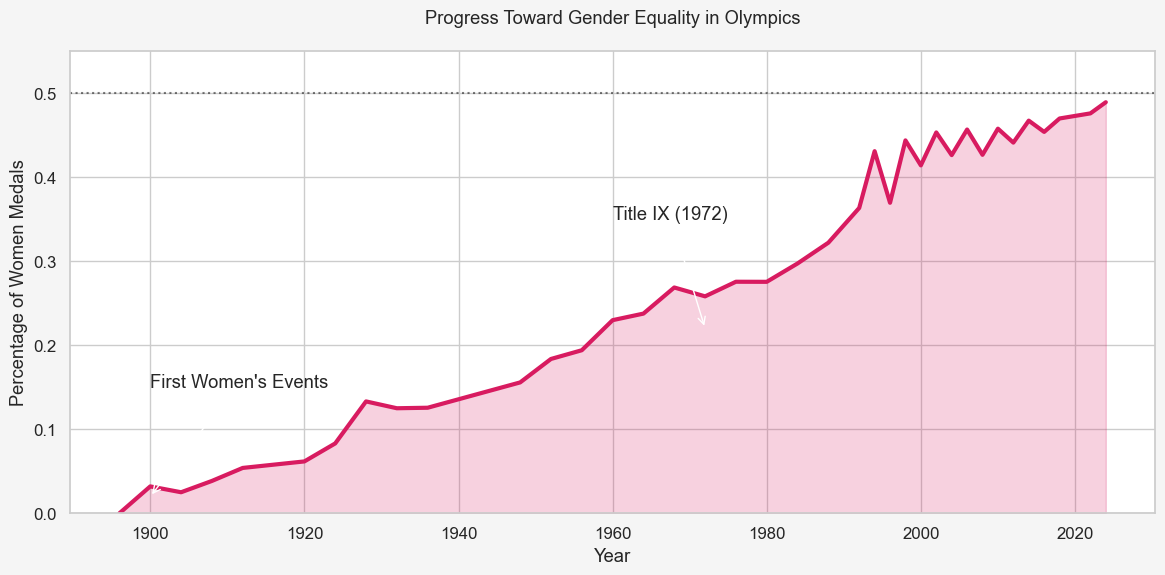

In [14]:
# Infographic: Gender Equality Progress
gender_timeline = (
    cleaned_data[cleaned_data['event_gender'].isin(["Men's", "Women's"])]
    .groupby(['year', 'event_gender']).size().unstack()
    .assign(Women_ratio=lambda x: x["Women's"]/(x["Women's"]+x["Men's"]))
)

plt.figure(figsize=(14, 6))
plt.plot(gender_timeline.index, gender_timeline['Women_ratio'], 
        color='#d81b60', linewidth=3)
plt.fill_between(gender_timeline.index, gender_timeline['Women_ratio'], 
                color='#d81b60', alpha=0.2)
plt.axhline(0.5, color='black', linestyle=':', alpha=0.5)
plt.annotate('First Women\'s Events', xy=(1900, 0.02), 
            xytext=(1900, 0.15), arrowprops=dict(arrowstyle='->'))
plt.annotate('Title IX (1972)', xy=(1972, 0.22), 
            xytext=(1960, 0.35), arrowprops=dict(arrowstyle='->'))
plt.title('Progress Toward Gender Equality in Olympics', pad=20)
plt.xlabel('Year')
plt.ylabel('Percentage of Women Medals')
plt.ylim(0, 0.55)
plt.show()

In [15]:
fig = px.line(trend_data, x='year', y='count', color='medal', 
            facet_col='country', facet_col_wrap=3)
fig.show()

In [16]:
# Requires country coordinates
country_geo = cleaned_data.groupby('country_code').size().reset_index(name='medals')
fig = px.choropleth(country_geo, locations='country_code', 
                    color='medals', scope='world')
fig.show()

# Feature Engineering

In [17]:
# Feature Engineering
def engineer_features(df):
    return (
        df
        # Create medal points system for weighted rankings
        .assign(medal_points=lambda x: x['medal'].map({'Gold': 3, 'Silver': 2, 'Bronze': 1}))
        # Add decade for trend analysis
        .assign(decade=lambda x: (x['year'] // 10) * 10)
        # Extract host city from games
        .assign(host_city=lambda x: x['games'].str.split().str[-1])
        # Flag team vs individual events
        .assign(is_team_event=lambda x: x['event_name'].str.contains('Team|Relay|Doubles'))
    )
enhanced_data = engineer_features(cleaned_data) 

In [18]:
enhanced_data.head()

,season,year,medal,country_code,country,athletes,games,sport,event_gender,event_name,year_date,decade,is_team,medal_points,host_city,is_team_event
0,Summer,1896,Gold,USA,United States,Thomas BURKE,1896 Athens,Athletics,Men's,100m,1896-01-01,1890,False,3,Athens,False
1,Summer,1896,Silver,GER,Germany,Fritz HOFMANN,1896 Athens,Athletics,Men's,100m,1896-01-01,1890,False,2,Athens,False
2,Summer,1896,Bronze,HUN,Hungary,Alajos SZOKOLYI,1896 Athens,Athletics,Men's,100m,1896-01-01,1890,False,1,Athens,False
3,Summer,1896,Bronze,USA,United States,Francis LANE,1896 Athens,Athletics,Men's,100m,1896-01-01,1890,False,1,Athens,False
4,Summer,1896,Gold,USA,United States,Thomas BURKE,1896 Athens,Athletics,Men's,400m,1896-01-01,1890,False,3,Athens,False
